# Data Analysis & Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

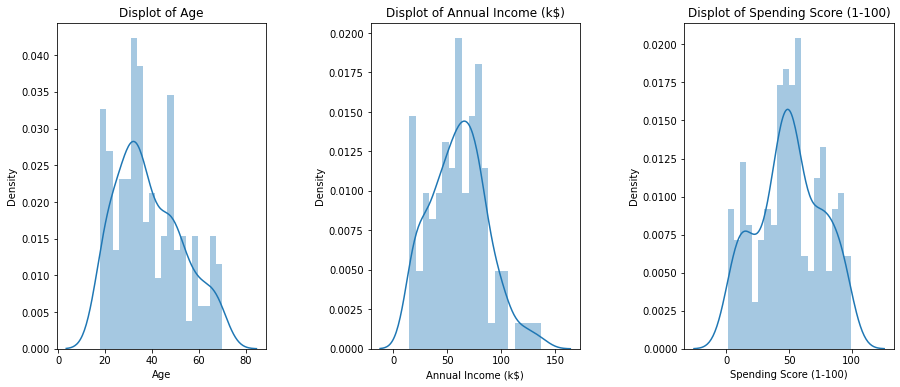

In [17]:
plt.figure(1, figsize=(15,6))
n=0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('Displot of {}'.format(x))
plt.show()

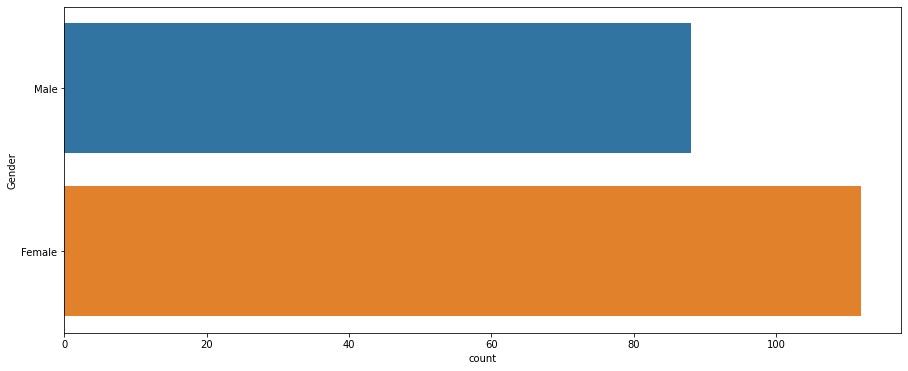

In [18]:
plt.figure(1, figsize=(15,6))
sns.countplot(y="Gender", data=df)
plt.show()

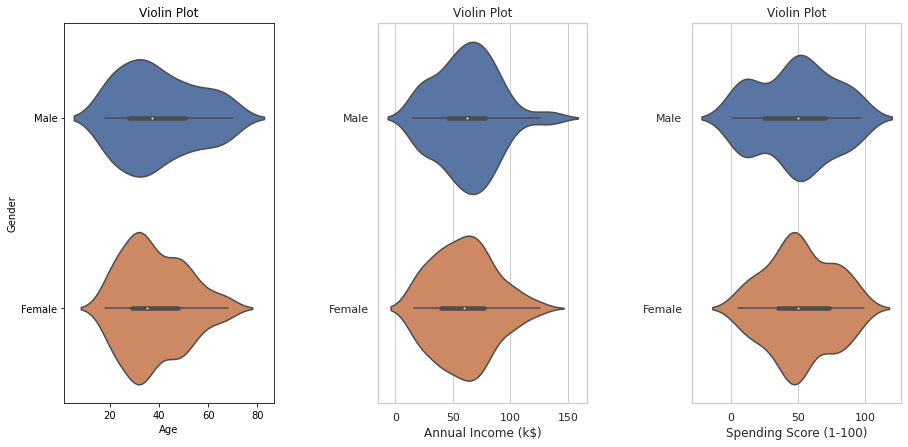

In [19]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x=cols, y = "Gender", data=df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')
plt.show()

In [21]:
age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
age_55_above = df.Age[(df.Age>=56)]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values) ,len(age_55_above.values)]

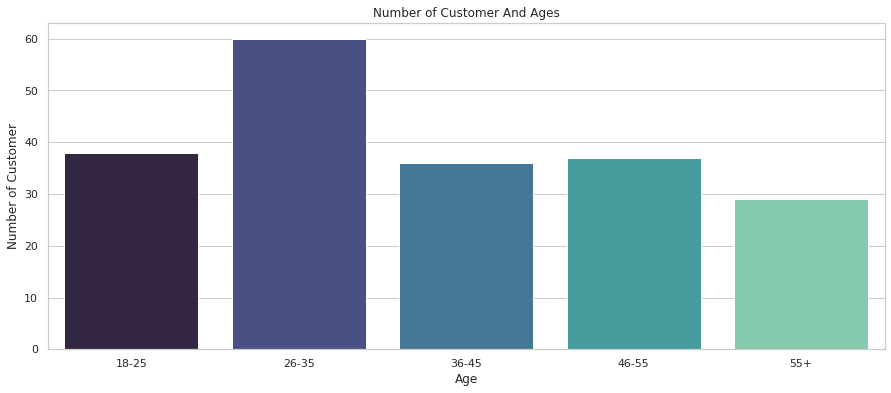

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x= agex, y = agey, palette="mako")
plt.title("Number of Customer And Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

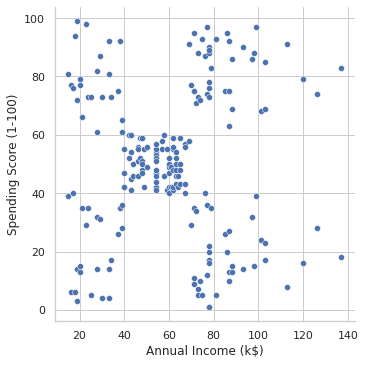

In [23]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

In [30]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=1 ) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=21 ) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=41 ) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=61 ) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >=81 ) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

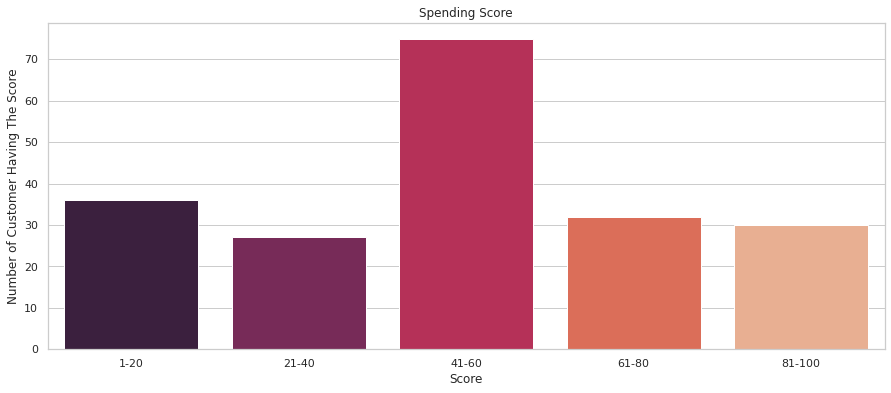

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette = "rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having The Score")
plt.show()

In [32]:
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=0 ) & (df["Annual Income (k$)"] <= 30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=31 ) & (df["Annual Income (k$)"] <= 60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=61 ) & (df["Annual Income (k$)"] <= 90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=91 ) & (df["Annual Income (k$)"] <= 120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >=121 ) & (df["Annual Income (k$)"] <= 150)]

aix = ['0-30','31-60', '61-90', '91-120', '121-150']
aiy = [len(ai_0_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

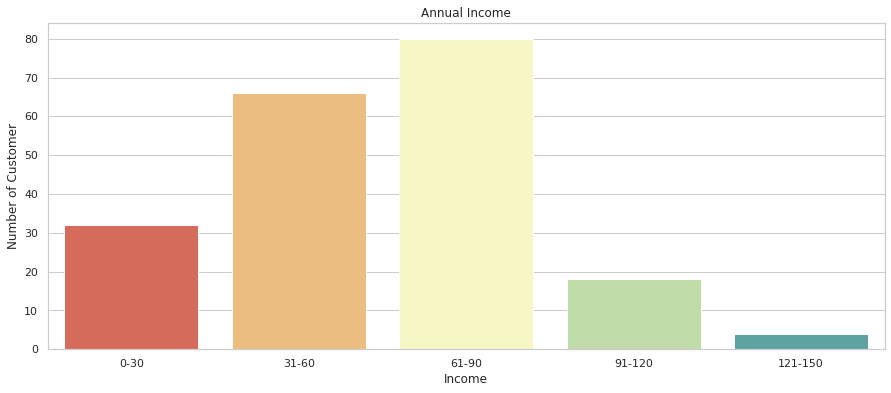

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x = aix, y = aiy, palette = "Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

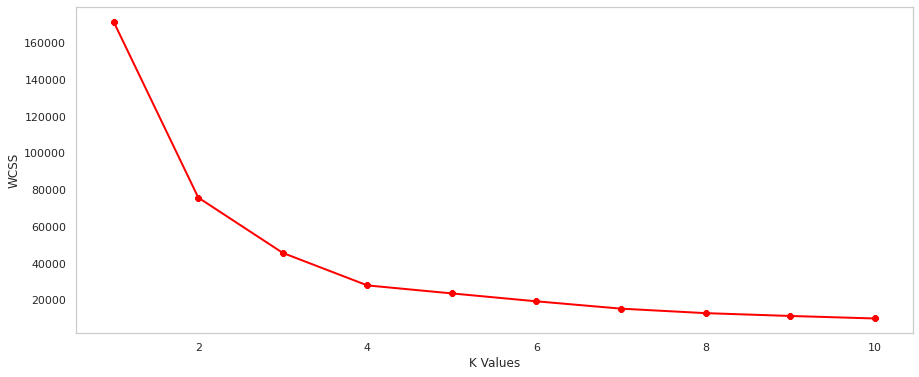

In [38]:
# Clusters based on Age and Spending Score
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel('K Values')
plt.ylabel("WCSS")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)

In [40]:
label

array([2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 0, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [41]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


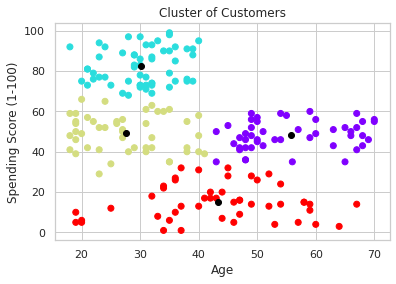

In [44]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster of Customers')
plt.show()

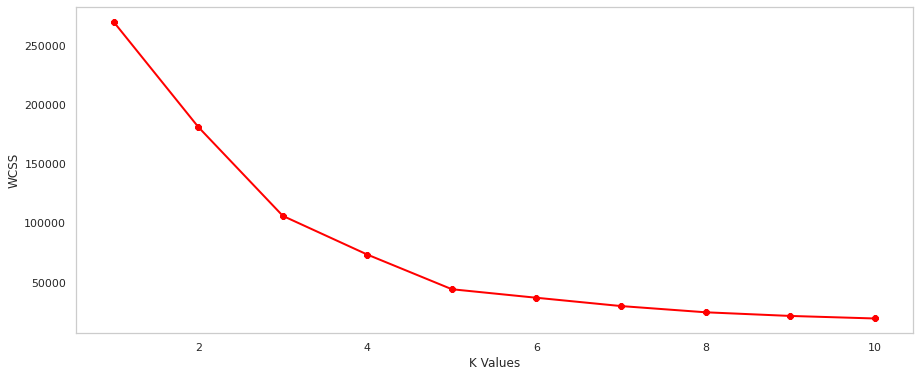

In [45]:
# Clusters based on Annual Income and Spending Score
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel('K Values')
plt.ylabel("WCSS")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
label

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [47]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

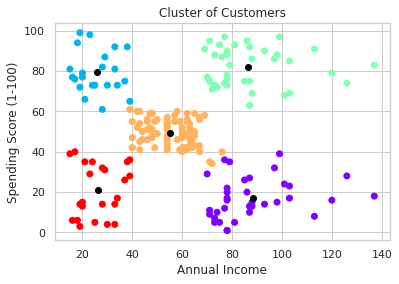

In [48]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster of Customers')
plt.show()

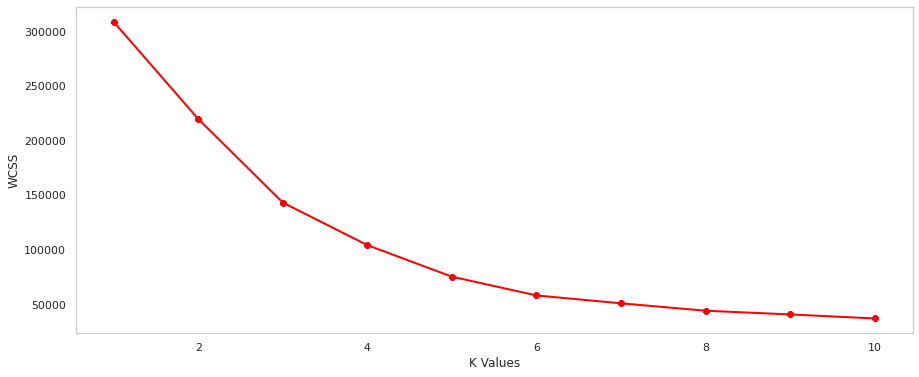

In [51]:
# Clusters based on Age , Annual Income and Spending Score
X3 = df.loc[:, ["Age","Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker = "8")
plt.xlabel('K Values')
plt.ylabel("WCSS")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
label

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

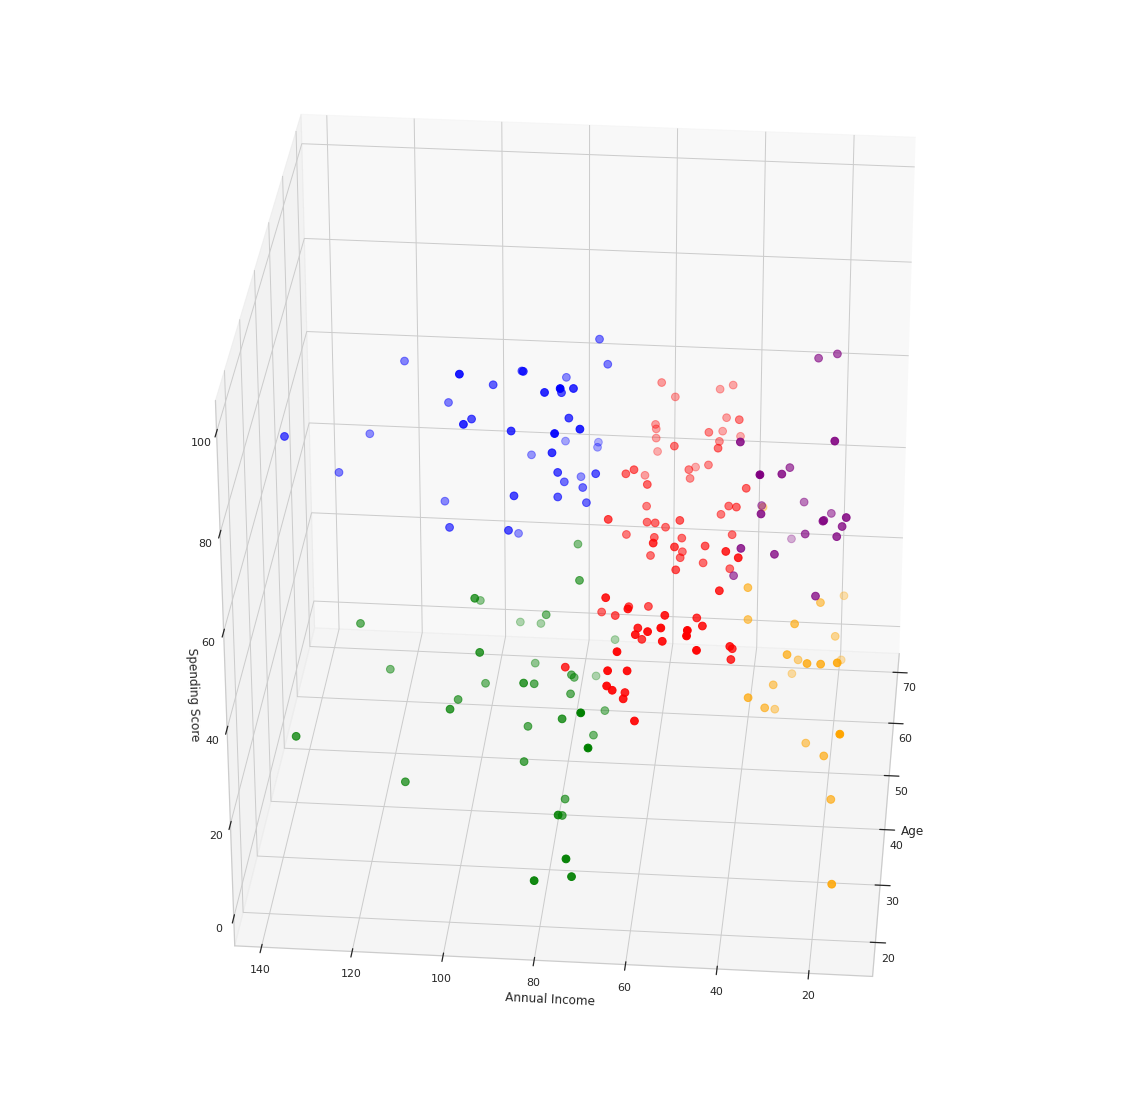

In [56]:
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
df["label"] = clusters

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()